<a href="https://colab.research.google.com/github/Sherly-Tuo/text-analysis-final/blob/main/final_project_SherlyTuo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marked Women, Unmarked Men? A Sentiment Analysis of Gender Marking in Chinese News Headlines



## 1. Introduction

According to the [Global Gender Gap Report]("https://www.weforum.org/publications/global-gender-gap-report-2025/") released by the World Economic Forum (2025), China ranks 103rd worldwide in terms of the gender gap. China’s relatively low position in gender-gap rankings can be observed across various aspects of social life (Wang et al., 2024).

Meanwhile, feminism in China has been developing amid various tensions. An increasing number of females have begun to speak openly about gender issues (Hou, 2021), which has sparked wide public debate. Much of this debate is reflected on social media. Piao et al. (2025) find, through their analysis of major short-video platforms in China, that public opinions toward feminism have become markedly polarized. Such polarization not only reflects societal divisions but also further shapes the discursive environment surrounding gender issues.

This complex environment reflects the potential for policy change. Kingdon (1995) proposed the policy-window framework, which argues that policy change does not occur at any moment; rather, it requires the convergence of three “streams” at a particular point in time to open a policy window. These streams are:
*   Problem Stream. This refers to the emergence of certain social issues that draw public attention.
*   Policy Stream. This refers to scholars, experts, and government actors proposing various solutions, which are then discussed and filtered.
*   Politics Stream. This refers to the level of attention and support that policy decision-makers give to the issue.

In the context of gender issues, the polarized discourse in the media reflects the dynamics of the “problem stream,” as public debates surrounding feminism have heightened the visibility of these concerns. **This project, however, approaches the issue from the perspective of the “political stream,” using Chinese News Headlines as an entry point to examine how the media present and construct gender-related topics, thereby offering potential insights for future policymaking.**



## 2.Hypothesis

This project proposes the following hypotheses:
*   H1: News reports are more likely to explicitly specify gender when the subject involved is female rather than male.
*   H2: When gender is specified, news reports involving women are more likely to be associated with negative evaluative language compared to reports involving men.

## 3. Research Method

1. Data Collection: Because major Chinese news websites have high access restrictions and It is difficult to find a platform similar to NewsAPI. Therefore I used [TianAPI]("https://www.tianapi.com/"), which is a well-known API provider in China. I selected its [“Social News”]("https://www.tianapi.com/apiview/3") section to collect news articles.

2. Data Cleaning: During the scraping &fetching process, the same news headline could appear with multiple keywords, so I removed duplicate news headlines when creating the df_all dataset. After collecting the data, I renamed the columns to make them clearer, converted them into the correct data types, removed missing values, and cleaned extra blank spaces.

3. Sentiment Analysis: The Baidu Sentiment Analysis API is a cloud-based tool that provides sentiment classification for Chinese text. After creating an application on Baidu AI Cloud, the platform provides an API Key, and Secret Key, which allow users to send text to the API and receive sentiment scores(with free limited access). The reasons for choosing this will be discussed in a later section.

4. Data Visualization: I used plotly.express as my visualization tool.


## 4.Data Analysis

This section will be divided into two parts, data process(data collection, data cleasing) and analysis(genernal analysis and sentiment analysis).

### 4.1 Data Process

This part begins with analyzing the data gathered from the TianAPI's social news section.

#### 4.1.1 Import All Necessary Packages

The project installed the packages that might be needed for the analysis. This includes the basic tools for data handling(requests, pandas), as well as several Chinese sentiment-analysis packages such as SnowNLP and cnsenti, along with the Hugging Face transformers library.

In [ ]:
!pip install transformers torch requests pandas -q

import requests
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

#### 4.1.2 Data collection

Since this project aims to examine the extent to which gender is specified in news reports across different topics, and whether headlines mentioning “women” are more likely to carry negative sentiment, the data collection stage involved continuously adjusting the Topic_keywords dictionary. Through this process, the project ultimately identified four main topics(Gender-based violence, fraud, traffic incident and violent crime) and the keywords associated with each of them.

In [ ]:
API_KEY = "b4a4a5db423056f00eebfb16b5bad557"

BASE_URL = "https://apis.tianapi.com/social/index"

Topic_keywords = {
    "gender_based_violence": ["家暴", "家庭暴力", "施暴", "虐待", "性侵", "性侵害", "涉性侵", "性骚扰", "猥亵", "强奸", "强制猥亵",
                              "前男友", "男友", "前夫", "丈夫", "情侣", "感情纠纷", "情杀","硫酸"],
   "fraud": ["裸聊", "诈骗", "被骗", "受骗","电信诈骗", "网络诈骗", "杀猪盘","冒充客服", "行骗", "骗局"],
    "traffic_incident": ["交通事故", "车祸", "肇事", "追尾", "撞车", "连环撞","高速", "车辆侧翻", "货车", "出租车", "酒驾", "醉驾", "驾驶员"],
    "violent_crime": ["嫌疑", "嫌疑人", "嫌犯", "犯罪嫌疑人","凶手", "行凶", "持刀", "砍", "捅", "刺", "杀","命案", "凶案", "伤害案", "故意伤害","袭击", "攻击",
    "殴打", "拳击", "打死", "殴打致","遇害", "被害", "身亡", "死亡", "致死","绑架", "劫持", "拐走","失踪", "失联","受害", "受害者"]
}

# Translation:
# Topic_keywords = {
#     “gender_based_violence”: [“domestic violence”, “family violence”, “abuse”, “assault”,
#                               “sexual assault”, “sexual violence”, “sexual harassment”, “molestation”, ‘rape’, “forcible indecency”,
#                               “ex-boyfriend”, “boyfriend”, “ex-husband”, “husband”, ‘couple’, “romantic dispute”, “murder by lover”, “sulfuric acid attack”],
#    “fraud”: [“sextortion”, “fraud”, “scammed”, “defrauded”, “telecom fraud”, “online fraud”, “pig butchering scam”,
#              “impersonating customer service”, ‘deception’, “scam”],
#     “traffic_incident”: [“traffic accident”, “car crash”, “hit-and-run”, “rear-end collision”,
#                          “car crash”, “chain collision”, “highway”, “vehicle rollover”, “truck”,
#                          ‘taxi’, “drunk driving”, “driving under the influence”, “driver”],
#     “violent_crime”: [“suspect”, “suspect”, “criminal suspect”, “murderer”, “assault”, “knife-wielding”, “chop”,
#                       “stab”, “kill”, ‘homicide’, “murder case”, “assault case”, “intentional injury”, " assault“, ”attack",
#                       “assault”, “punching”, “beat to death”, “beat to”, “killed”, “victim”, “fatality”, “death”, “fatal”,
#                       “kidnapping”, “abduction”, “abducted”, “missing”, “unaccounted for”, ‘victimized’, “victim”]
# }

In [ ]:
def fetch_social_page(page=1, num=50, word=None, rand=0, form=1):
    params = {
        "key": API_KEY,
        "num": num,
        "page": page,
        "rand": rand,
        "form": form,
    }
    if word:
        params["word"] = word

    resp = requests.get(BASE_URL, params=params, timeout=60)
    resp.raise_for_status()
    data = resp.json()

    if data.get("code") != 200:
        print("Wrong:", data.get("code"), data.get("msg"))
        return pd.DataFrame()

    result = data.get("result") or {}
    newslist = result.get("newslist") or result.get("list") or []

    if not newslist:
        return pd.DataFrame()

    df = pd.DataFrame(newslist)
    return df

In [ ]:
import time
def fetch_many_social_news(keyword=None, max_pages=200, num=50, sleep_sec=0.2):
    all_pages = []

    for page in range(1, max_pages + 1):
        print(f"Fetching page {page}  ...")

        df_page = fetch_social_page(page=page, num=num, word=keyword)

        if df_page.empty:
            print(f"Page {page} no data, the end")
            break

        df_page["keyword"] = keyword
        all_pages.append(df_page)

        if len(df_page) < num:
            print(f"Page {page} just has {num} news，end fetching")
            break

        time.sleep(sleep_sec)

    if not all_pages:
        print(f"The key words didn't get any news")
        return pd.DataFrame()

    df = pd.concat(all_pages, ignore_index=True)
    df = df.drop_duplicates(subset=["title"]).reset_index(drop=True)
    print(f"The key words get {len(df)} news")
    return df

In [ ]:
def fetch_all_topics(topic_keywords, max_pages=50, num=50, sleep_sec=0.2):
    all_dfs = []

    for topic, kw_list in topic_keywords.items():
        for kw in kw_list:
            print(f"Fetching data")
            df_kw = fetch_many_social_news(
                keyword=kw,
                max_pages=max_pages,
                num=num,
                sleep_sec=sleep_sec
            )
            if df_kw.empty:
                continue

            df_kw["topic"] = topic
            all_dfs.append(df_kw)

    if not all_dfs:
        print("not any data")
        return pd.DataFrame()

    df_all = pd.concat(all_dfs, ignore_index=True)
    df_all = df_all.drop_duplicates(subset=["title"]).reset_index(drop=True)

    print(f"\n there are  {len(df_all)} news after cleansing")
    return df_all

In [ ]:
df_all = fetch_all_topics(Topic_keywords, max_pages=30, num=50, sleep_sec=0.2)

df_all[["topic", "keyword", "ctime", "title"]].head()

Fetching data
Fetching page 1  ...
Page 1 just has 50 news，end fetching
The key words get 1 news
Fetching data
Fetching page 1  ...
Page 1 just has 50 news，end fetching
The key words get 1 news
Fetching data
Fetching page 1  ...
Wrong: 250 数据返回为空
Page 1 no data, the end
The key words didn't get any news
Fetching data
Fetching page 1  ...
Page 1 just has 50 news，end fetching
The key words get 1 news
Fetching data
Fetching page 1  ...
Page 1 just has 50 news，end fetching
The key words get 3 news
Fetching data
Fetching page 1  ...
Wrong: 250 数据返回为空
Page 1 no data, the end
The key words didn't get any news
Fetching data
Fetching page 1  ...
Page 1 just has 50 news，end fetching
The key words get 1 news
Fetching data
Fetching page 1  ...
Page 1 just has 50 news，end fetching
The key words get 1 news
Fetching data
Fetching page 1  ...
Page 1 just has 50 news，end fetching
The key words get 2 news
Fetching data
Fetching page 1  ...
Page 1 just has 50 news，end fetching
The key words get 4 news
Fe

,topic,keyword,ctime,title
0,gender_based_violence,家暴,2017-04-17 00:36,家暴中被咬掉鼻子的女人：在农村离婚很丢人
1,gender_based_violence,家庭暴力,2024-12-09 12:38,家庭暴力认定证据标准明确！九部门联合印发实施意见
2,gender_based_violence,虐待,2018-05-21 00:00,虐待动物的背后，藏着的可能是凶杀、强奸和家暴
3,gender_based_violence,性侵,2018-08-07 00:00,性侵丑闻频发，如何保留证据才能将性侵者绳之以法？
4,gender_based_violence,性侵,2018-01-05 00:00,性侵儿童之殇：暴露比例仅冰山一角 超70%为熟人作案


#### 4.1.3 Data Cleansing

Before moving on to more detailed cleaning, it is useful to use basic functions such as .head() and .info() to take a look at the dataset and understand its structure.

In [ ]:
df_all.head()

,id,ctime,title,description,source,picUrl,url,keyword,topic
0,15a27edc5b0f070b680d060c8a49db17,2017-04-17 00:36,家暴中被咬掉鼻子的女人：在农村离婚很丢人,家暴循环，最终被毁容。《反家庭暴力法》实施一年，如何更好地保护家庭成员？酿成悲剧，她有没有责...,搜狐社会,http://photocdn.sohu.com/20170417/Img488832815...,http://news.sohu.com/20170417/n488832814.shtml,家暴,gender_based_violence
1,9c06bc0ad41f588ef9fe417c9d86daba,2024-12-09 12:38,家庭暴力认定证据标准明确！九部门联合印发实施意见,对告诫制度的实体和程序规范、告诫制度与相关制度的衔接、告诫制度的具体实施等分别作出了明确规定。,南方社会,https://nfassetoss.southcn.com/__asset/47d3553...,https://news.southcn.com/node_179d29f1ce/21b27...,家庭暴力,gender_based_violence
2,2bdf5cbb825ad89a163d8ff2486fbab8,2018-05-21 00:00,虐待动物的背后，藏着的可能是凶杀、强奸和家暴,凤凰社会,凤凰社会,http://d.ifengimg.com/w150_h95/p0.ifengimg.com...,http://news.ifeng.com/a/20180521/58394804_0.shtml,虐待,gender_based_violence
3,124adffa3a00e83bbedf14a8ca98b2b6,2018-08-07 00:00,性侵丑闻频发，如何保留证据才能将性侵者绳之以法？,凤凰社会,凤凰社会,http://d.ifengimg.com/w150_h95/d.ifengimg.com/...,http://news.ifeng.com/a/20180808/59689883_0.shtml,性侵,gender_based_violence
4,0e1508b50822949feda081d5d85a5753,2018-01-05 00:00,性侵儿童之殇：暴露比例仅冰山一角 超70%为熟人作案,凤凰社会,凤凰社会,http://d.ifengimg.com/w150_h95/p0.ifengimg.com...,http://news.ifeng.com/a/20180105/54861660_0.shtml,性侵,gender_based_violence


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           503 non-null    object
 1   ctime        503 non-null    object
 2   title        503 non-null    object
 3   description  503 non-null    object
 4   source       503 non-null    object
 5   picUrl       503 non-null    object
 6   url          503 non-null    object
 7   keyword      503 non-null    object
 8   topic        503 non-null    object
dtypes: object(9)
memory usage: 35.5+ KB


In [ ]:
df = df_all.copy()

df = df[["topic", "keyword", "ctime", "title"]].copy()

df["topic"] = df["topic"].str.split().str.join(" ")
df["keyword"] = df["keyword"].str.split().str.join(" ")
df["title"] = df["title"].str.split().str.join(" ")

df = df.dropna(subset=["title"])
df = df[df["title"] != ""]

df["ctime"] = pd.to_datetime(df["ctime"], errors="coerce")

df = df.rename(columns={
    "topic": "Topic",
    "keyword": "Key word",
    "ctime": "Date",
    "title": "Title"
})

df = df.reset_index(drop=True)

In [ ]:
print("Final df shape:", df.shape)
df.head()

Final df shape: (503, 4)


,Topic,Key word,Date,Title
0,gender_based_violence,家暴,2017-04-17 00:36:00,家暴中被咬掉鼻子的女人：在农村离婚很丢人
1,gender_based_violence,家庭暴力,2024-12-09 12:38:00,家庭暴力认定证据标准明确！九部门联合印发实施意见
2,gender_based_violence,虐待,2018-05-21 00:00:00,虐待动物的背后，藏着的可能是凶杀、强奸和家暴
3,gender_based_violence,性侵,2018-08-07 00:00:00,性侵丑闻频发，如何保留证据才能将性侵者绳之以法？
4,gender_based_violence,性侵,2018-01-05 00:00:00,性侵儿童之殇：暴露比例仅冰山一角 超70%为熟人作案


### 4.2 Genernal Analysis

The list of “female_terms” includes common female-related expressions found in news headlines. If a headline contains any of these terms, it is labeled as F-marked. The list of “male_terms” includes common male related expressions, and headlines containing any of these terms are labeled as M-marked. If a headline includes both types of terms, it is labeled as “Both.” Headlines without any gender-related terms are classified as "Unmarked".

In [ ]:
female_terms = [
    "女",  "姑娘", "妇" ,"妈妈", "母亲", "妻子", "前妻", "新娘",
    "阿姨", "奶奶", "婆婆", "外婆", "妈","娘","老婆"
]

#Translation
# female_terms = [
#     “woman”, “girl”, “female”,
#     “mom”, “mother”, ‘wife’, “ex-wife”, “bride”,
#     “aunt”, “grandma”, “mother-in-law”, “grandmother (maternal)”, ‘mom’, “mother”
# ]

male_terms = ["男","少年","小伙","爸爸","父亲","丈夫","前夫","丈夫","大爷","爷","大叔","壮汉","老汉"]

# male_terms = [“man”, “boy”, “young man”, “dad”, “father”, “husband”, “ex-husband”, “husband”,
#               “old man”, “uncle”, ‘uncle’, “strong man”, “old man”(different from the former one)]

In [ ]:
def detect_gender_from_title(title: str) -> str:
    title = str(title)

    has_female = any(term in title for term in female_terms)
    has_male = any(term in title for term in male_terms)

    if has_female and not has_male:
        return "F-marked"
    elif has_male and not has_female:
        return "M-marked"
    elif has_female and has_male:
        return "Both"
    else:
        return "Unmarked"

In [ ]:
df_gender = df.copy()
df_gender["Gender"] = df_gender["Title"].apply(detect_gender_from_title)
df_gender.head()

,Topic,Key word,Date,Title,Gender
0,gender_based_violence,家暴,2017-04-17 00:36:00,家暴中被咬掉鼻子的女人：在农村离婚很丢人,F-marked
1,gender_based_violence,家庭暴力,2024-12-09 12:38:00,家庭暴力认定证据标准明确！九部门联合印发实施意见,Unmarked
2,gender_based_violence,虐待,2018-05-21 00:00:00,虐待动物的背后，藏着的可能是凶杀、强奸和家暴,Unmarked
3,gender_based_violence,性侵,2018-08-07 00:00:00,性侵丑闻频发，如何保留证据才能将性侵者绳之以法？,Unmarked
4,gender_based_violence,性侵,2018-01-05 00:00:00,性侵儿童之殇：暴露比例仅冰山一角 超70%为熟人作案,Unmarked


In [ ]:
gender = df_gender.groupby(['Topic','Gender']).size().reset_index(name='Count')
gender


,Topic,Gender,Count
0,fraud,F-marked,4
1,fraud,M-marked,3
2,fraud,Unmarked,30
3,gender_based_violence,Both,115
4,gender_based_violence,F-marked,8
5,gender_based_violence,M-marked,27
6,gender_based_violence,Unmarked,48
7,traffic_incident,Both,1
8,traffic_incident,F-marked,19
9,traffic_incident,M-marked,20


In [ ]:
import plotly.express as px

fig1 = px.bar(
    gender,
    x="Topic",
    y="Count",
    color="Gender",
    barmode="group",
    title="Gender Marking Counts by Topic",
    text="Count"
)

fig1.show()

Figure 1. Gender Marking Counts by Topic

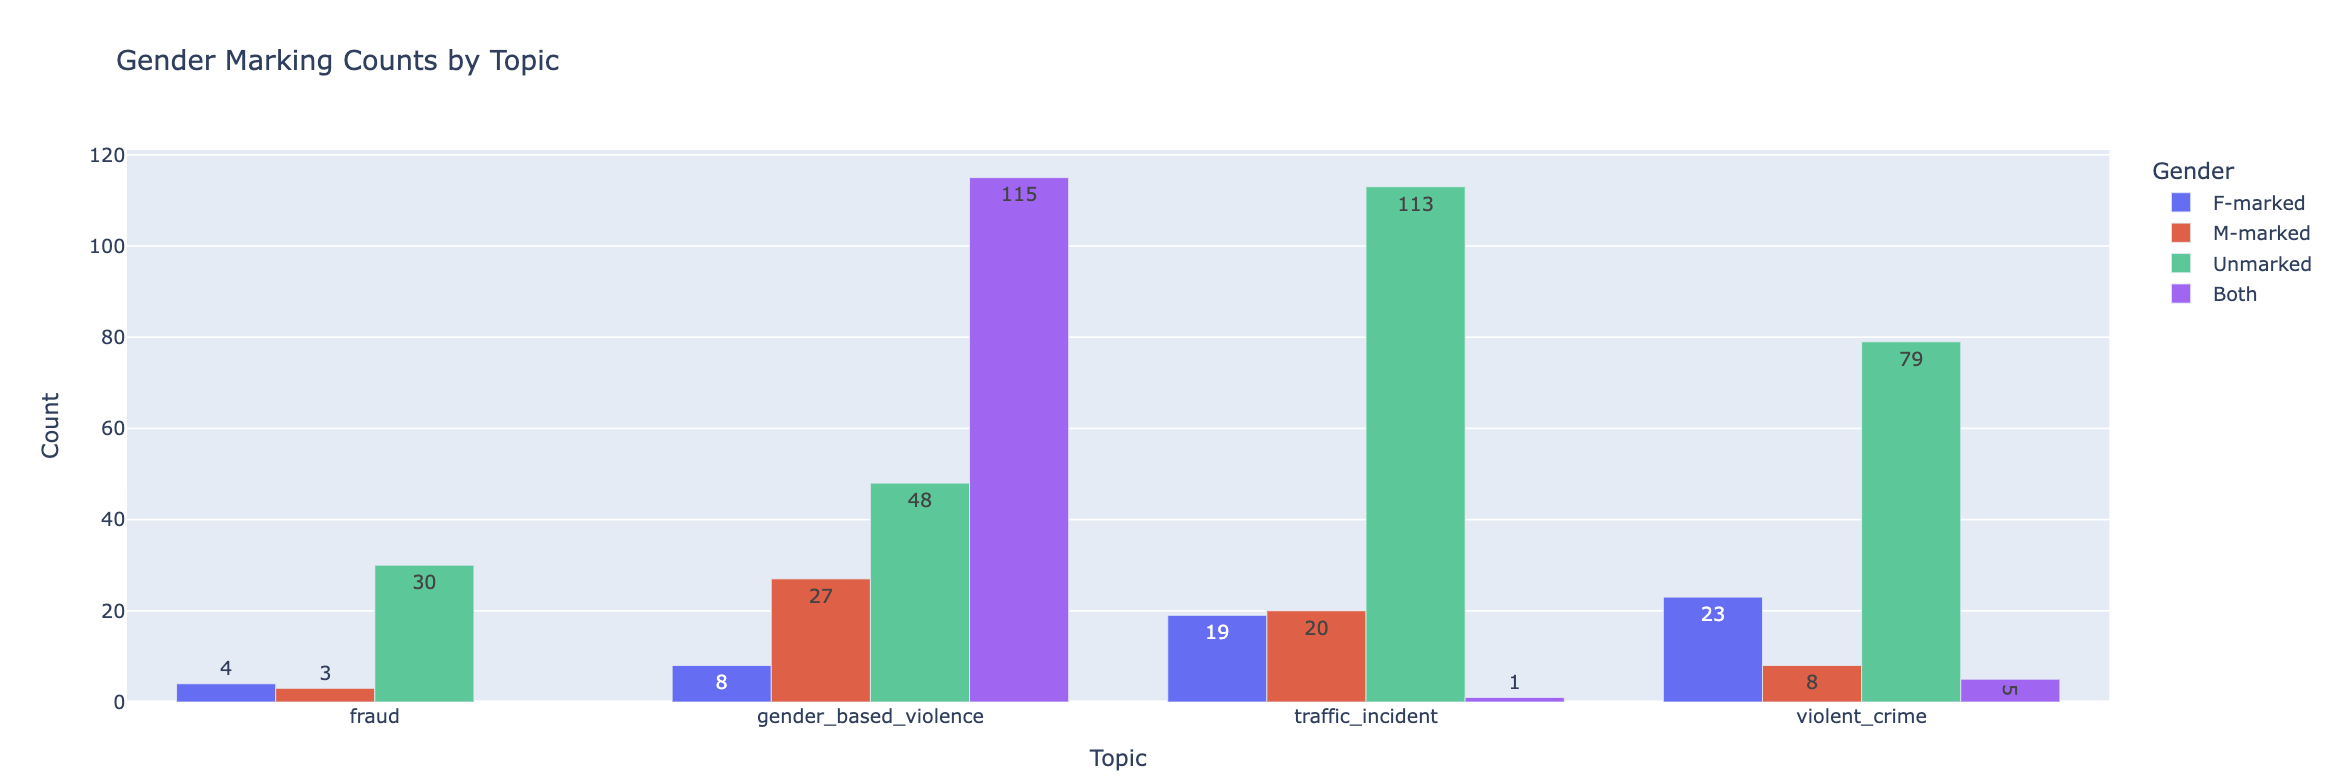

Figure 1 presents the distribution of gender marking across different topics. Except for gender-based violence, all topics show that unmarked headlines far outnumber those explicitly marked as male or female.

*   In fraud, female-marked headlines slightly outnumber male-marked ones.
*   In gender-based violence, headlines containing both female- and male-related terms appear most frequently, and male-marked headlines exceed female-marked ones.
*   In traffic incident, male-marked headlines are slightly more common than female-marked ones, while unmarked headlines constitute the largest share.
*   In violent crime, female-marked headlines appear substantially more often than male-marked headlines.











### 4.3 Sentimental Analysis

#### 4.3.1 Package Selection

To decide which package to use for sentiment analysis, I first tested several sentences that represent different types of news headlines. The goal was to see whether each tool could correctly recognize the negative or neutral tone in short Chinese texts.

In [ ]:
test_sentences = [
    "男子家暴被警方控制",
    "出台新规防止家暴",
    "男子行凶致两人伤亡",
    "恶性校园霸凌持续发酵",
    "女子诈骗犯人",
    "经济持续增长，股市大涨",
    "家暴",
    "诈骗",
    "车祸",
    "性侵",
    "性骚扰",
    '经济增长',
    '股市好'
]

#Translastion
# test_sentences = [
#     “Man restrained by police after domestic violence incident”,
#     “New regulations introduced to prevent domestic violence”,
#     “Man's violent attack leaves two dead or injured”,
#     “Severe school bullying continues to escalate”,
#     “Woman defrauds prisoner”,
#     “Sustained economic growth, stock market surges”,
#     “Domestic violence”,
#     “Fraud”,
#     “Car accident”,
#     “Sexual assault”,
#     “Sexual harassment”,
#     ‘Economic growth’,
#     ‘Good Stock market performance’
# ]

In [ ]:
model_name = "uer/roberta-base-finetuned-jd-binary-chinese"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval()

print(model.config.id2label)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/295 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/409M [00:00<?, ?B/s]

{0: 'negative (stars 1, 2 and 3)', 1: 'positive (stars 4 and 5)'}


In [ ]:
def get_sentiment_score(text: str):
    if not isinstance(text, str) or text.strip() == "":
        return None

    inputs = tokenizer(
        text,
        max_length=64,
        truncation=True,
        padding="max_length",
        return_tensors="pt"
    )
    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.softmax(outputs.logits, dim=1)[0]

    return float(probs[1])

In [ ]:
!pip install snownlp cnsenti -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 16.3 MB/s eta 0:00:00


In [ ]:
from snownlp import SnowNLP
from cnsenti import Sentiment
senti = Sentiment()


/usr/local/lib/python3.12/dist-packages/jieba/__init__.py:44: SyntaxWarning: invalid escape sequence '\.'
  re_han_default = re.compile("([\u4E00-\u9FD5a-zA-Z0-9+#&\._%\-]+)", re.U)
/usr/local/lib/python3.12/dist-packages/jieba/__init__.py:46: SyntaxWarning: invalid escape sequence '\s'
  re_skip_default = re.compile("(\r\n|\s)", re.U)
/usr/local/lib/python3.12/dist-packages/jieba/finalseg/__init__.py:78: SyntaxWarning: invalid escape sequence '\.'
  re_skip = re.compile("([a-zA-Z0-9]+(?:\.\d+)?%?)")


In [ ]:
def snow_score(text):
    return SnowNLP(text).sentiments

def cnsenti_score(text):
    res = senti.sentiment_count(text)
    pos = res["pos"]
    neg = res["neg"]
    return pos / (pos + neg + 1e-6)


In [ ]:
print("=== Hugging face ===")
for t in test_sentences:
     print(t, get_sentiment_score(t))

print("\n=== SnowNLP ===")
for t in test_sentences:
    print(t, snow_score(t))

print("\n=== cnsenti ===")
for t in test_sentences:
    print(t, cnsenti_score(t))


=== Hugging face ===
男子家暴被警方控制 0.6358070373535156
出台新规防止家暴 0.8469868898391724
男子行凶致两人伤亡 0.6736481189727783
恶性校园霸凌持续发酵 0.9351804852485657
女子诈骗犯人 0.060265835374593735
经济持续增长，股市大涨 0.9431881904602051
家暴 0.5443830490112305
诈骗 0.02143722213804722
车祸 0.5404833555221558
性侵 0.7710819244384766
性骚扰 0.5776398181915283
经济增长 0.9356492161750793


Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...


股市好 0.9219497442245483

=== SnowNLP ===
男子家暴被警方控制 0.09660636392788902
出台新规防止家暴 0.8932360246556164
男子行凶致两人伤亡 0.8896853641235644
恶性校园霸凌持续发酵 0.9890276462856211
女子诈骗犯人 0.1575737923016174
经济持续增长，股市大涨 0.9921674276245005
家暴 0.5446626325120026
诈骗 0.19999999999999996
车祸 0.8999999999999999
性侵 0.7746784065121339
性骚扰 0.5817111671300769
经济增长 0.8870970062440957
股市好 0.9391811331601121

=== cnsenti ===


Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 2.733 seconds.
DEBUG:jieba:Loading model cost 2.733 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


男子家暴被警方控制 0.0
出台新规防止家暴 0.9999990000010001
男子行凶致两人伤亡 0.0
恶性校园霸凌持续发酵 0.0
女子诈骗犯人 0.0
经济持续增长，股市大涨 0.0
家暴 0.0
诈骗 0.0
车祸 0.0
性侵 0.0
性骚扰 0.0
经济增长 0.0
股市好 0.0


By testing these sentences/terms/vocubularies above, I found that none of the three packages performed well on my dataset. All of them use a 0–1 scoring scale (0 = negative, 1 = positive), yet their outputs often failed to match the meaning of the headlines. Hugging Face models frequently labeled clearly negative crime-related headlines as neutral or positive. SnowNLP produced unstable and inconsistent scores, and cnsenti failed to detect sentiment for many violent or sensitive terms, assigning zeros to headlines that were obviously negative. These issues suggested that the packages were not reliable for short Chinese news texts.

After reviewing alternative tools, I chose the Baidu Sentiment Analysis API to have a look.

In [ ]:
API_KEY_BAIDU = "nIn9qr8sLr99uBh5jOnZgLwf"
SECRET_KEY_BAIDU = "lma4XtdJvK5zcnVCPgUgXEHnqRVxjeXY"

In [ ]:
token_url = "https://aip.baidubce.com/oauth/2.0/token"

params = {
    "grant_type": "client_credentials",
    "client_id": API_KEY_BAIDU,
    "client_secret": SECRET_KEY_BAIDU
}

resp = requests.get(token_url, params=params)
resp_json = resp.json()

access_token = resp_json.get("access_token")
print("access_token:", access_token)

access_token: 24.6c69164baaea22ac60322d4ed36aa828.2592000.1767722672.282335-121208048


In [ ]:
import json
import requests

def ernie_sentiment(text: str):
    if not isinstance(text, str) or text.strip() == "":
        return None

    url = f"https://aip.baidubce.com/rpc/2.0/nlp/v1/sentiment_classify?access_token={access_token}"

    headers = {"Content-Type": "application/json"}
    data = {"text": text}

    res = requests.post(url, headers=headers, data=json.dumps(data))
    res_json = res.json()

    try:
        item = res_json["items"][0]
        return float(item["positive_prob"])
    except:
        print("Error:", text, res_json)
        return None


In [ ]:
for t in test_sentences:
    print(t, ernie_sentiment(t))

男子家暴被警方控制 0.2728
出台新规防止家暴 0.767978
男子行凶致两人伤亡 0.932927
恶性校园霸凌持续发酵 0.0503846
女子诈骗犯人 0.00249951
经济持续增长，股市大涨 0.517976
家暴 0.436139
诈骗 8.11656e-05
车祸 0.108286
性侵 0.535504
性骚扰 0.310975
经济增长 0.791125
股市好 0.971773


I chose the Baidu Sentiment Analysis API because it aligned much more closely with the expected sentiment of my test examples, particularly for short Chinese headlines involving crime or violence.

#### 4.3.2 Data Visualization and Analysis

In [ ]:
df_gender["sentiment"] = df_gender["Title"].astype(str).apply(ernie_sentiment)

In [ ]:
fig = px.bar(
    df_gender.groupby("Gender")["sentiment"].mean().reset_index(),
    x="Gender",
    y="sentiment",
    color="Gender",
    title="Average Sentiment Score by Gender-marked Headlines"
)
fig.show()

Figure 2. Average Sentiment Score by Gender-marked Headlines

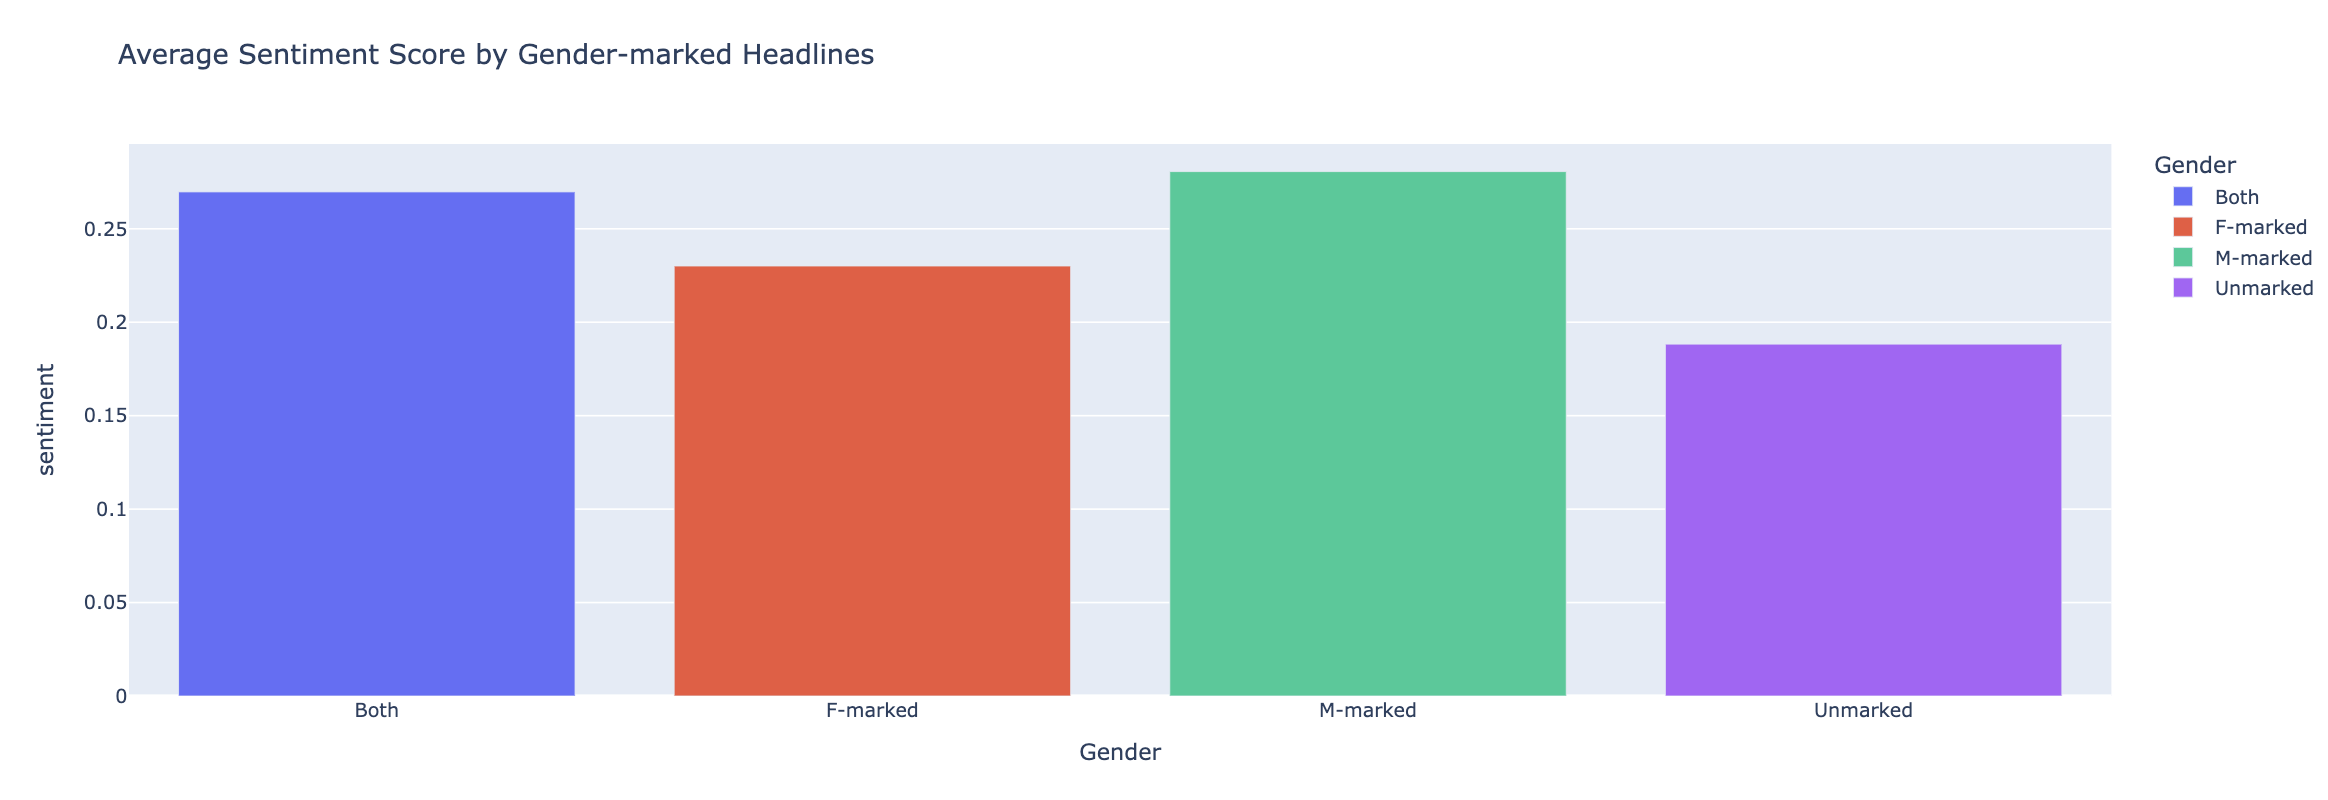

Figure 2 shows the average sentiment scores of news headlines across different gender-marked categories. Because the topics and keywords selected in this study are largely related to negative social events, the overall sentiment scores tend to be low. As shown in Figure 2, gender-marked headlines exhibit slightly higher average sentiment scores than unmarked ones, indicating a relatively more positive tendency. Among all gender-marked categories, headlines referring to women (F-marked) have the lowest sentiment scores, while those referring to men (M-marked) show the highest.

In [ ]:
topic_sent = df_gender.groupby(["Topic", "Gender"])["sentiment"].mean().reset_index()

fig = px.bar(
    topic_sent,
    x="Topic",
    y="sentiment",
    color="Gender",
    barmode="group",
    title="Sentiment by Topic and Gender Marking"
)
fig.show()

Figure 3. Sentiment by Topic and Gender Marking

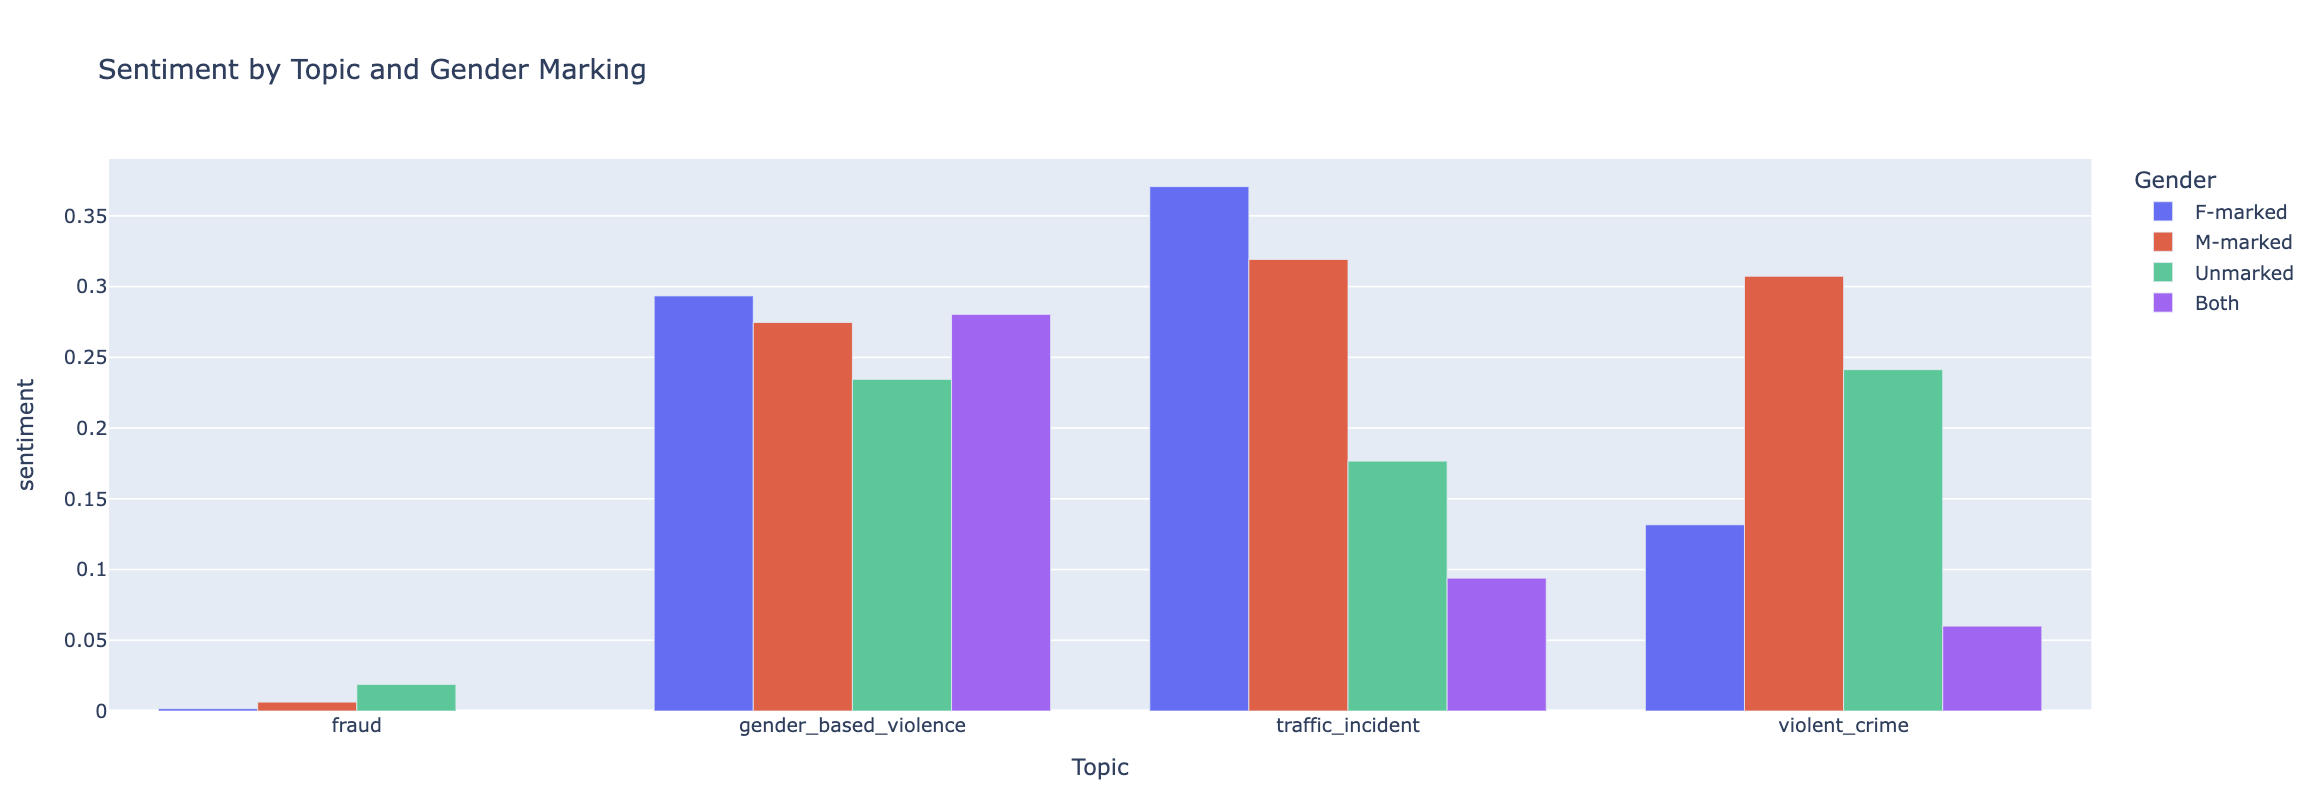

Figure 3 displays sentiment scores across different topics. Due to the small sample size of fraud, this topic is not analyzed in depth. In the violent crime category, headlines marked as female (F-marked) show the lowest sentiment scores, whereas in gender-based violence, female-marked headlines score relatively higher. Within traffic incidents, male-marked (M-marked) headlines exhibit the highest average sentiment scores across genders. In addition, unmarked headlines show the lowest sentiment scores in the traffic incident topic.

## 5.Discussion and Limitations

### 5.1 Evaluation of Hypotheses

**For H1(News reports are more likely to explicitly specify gender when the subject involved is female rather than male).** Gender marking does occur slightly more frequently for women than for men, which provides partial support for H1. However, the overall pattern is less polarized than often portrayed in social media discussion, and the tendency to specify gender varies substantially across topics. From the figure 1, in the gender-based violence category, headlines most frequently marked both genders, reflecting the typical victim–offender structure of such reports. In traffic incidents, gender marking for men and women appeared in roughly equal proportions. In violent crime, gender marking for women occurred more often than for men.

However, it is important to note that this pattern may be influenced by the roles typically associated with each gender in these topics. In gender-based violence, women are overwhelmingly positioned as victims and men as perpetrators. It may enable female looks more vulberable.

In [ ]:
subset = df_gender[
    (df_gender["Topic"] == "gender_based_violence") &
    (df_gender["Gender"] == "Both")
]

print(subset.sample(30).to_string())

                     Topic Key word                Date                       Title Gender  sentiment
84   gender_based_violence       丈夫 2016-08-09 01:36:00      丈夫陷传销带钱离家三年 回家后被妻子赶出家门   Both   0.023814
36   gender_based_violence       丈夫 2022-03-09 00:00:00     丈夫博士毕业后离婚，妻子提出家务补偿！法院判了   Both   0.009295
149  gender_based_violence       情侣 2018-02-04 00:00:00    情侣违规登山女方受伤失联 获救男子：她挂在崖壁上   Both   0.149121
188  gender_based_violence       情侣 2015-11-28 13:42:00     情侣相约殉情 男方勒死女友后打110：警察不来   Both   0.283956
23   gender_based_violence       男友 2016-08-26 08:21:00      男友被甩为泄愤晒女友手机号 称是马蓉最新号码   Both   0.783719
67   gender_based_violence       丈夫 2017-01-11 20:38:00        丈夫出轨还家暴 妻子患上抑郁将其下体割断   Both   0.008291
80   gender_based_violence       丈夫 2016-09-15 16:15:00      丈夫出轨小三怀孕 原配受婆婆虐待只剩20公斤   Both   0.002498
33   gender_based_violence       前夫 2015-09-17 06:20:00      前夫隐瞒中奖逼离婚 女子上诉要分230万彩金   Both   0.001105
110  gender_based_violence       丈夫 2016-03-08 06:29:00        丈夫疑妻子做足浴涉黄 当街扒光其上身暴

**For H2(When gender is specified, news reports involving women are more likely to be associated with negative evaluative language compared to reports involving men).** the figure2 and figure3 provide limited support. On average, headlines that explicitly mention women tend to receive slightly more negative sentiment scores than men. However, the difference is small, and the direction of the effect varies across topics.

Nevertheless, an important nuance needs to be considered. In many cases, male functions as a primary gender, so usually will be marked as 'Unmarked'.As shown in Figure 2, headlines without any gender marking (“unmarked”) have the lowest overall sentiment scores, which means part of the negativity associated with male subjects may be hidden within the unmarked group.

### 5.2 Limitation

This project has several limitations. First, the data comes from a single API, so the headlines may not fully represent all Chinese news sources. Second, the topic categories are based on predefined keywords, which means some headlines may be misclassified. Third, the gender labels rely on explicit gender terms, so more subtle forms of gender reference cannot be captured. Fourth, although Baidu’s sentiment model worked best for my tests, it may still miss nuances in news language. Finally, the analysis is based only on headlines, which might not reflect the tone of the full articles.


## 6 Conclusion

This project examined how gender appears in Chinese news headlines and whether women are described more negatively. The results offer partial support for both hypotheses.

At the policy level, this project reveals that gender issues in real-world contexts are less polarized than on social media. Meanwhile, certain news headlines do explicitly label female identities, exacerbating their vulnerable positions. Therefore, developing strategies for crafting unbiased headlines may be necessary.

## References

Hou, L. (2020). Rewriting “the personal is political”: Young women’s digital activism and new feminist politics in China. Inter-Asia Cultural Studies, 21(3), 337–355. https://doi.org/10.1080/14649373.2020.1796352

Kingdon, J. W. (1995). Agendas, alternatives, and public policies (2nd ed.). HarperCollins College Publishers.

Piao, J., Zhang, F., Ren, T., & others. (2025). Polarization of public opinions on feminism in China. Humanities and Social Sciences Communications, 12, 586. https://doi.org/10.1057/s41599-025-04635-z

Wang, Q., Chiang, T. F., & Xiao, J. J. (2024). Attitude toward gender inequality in China. Humanities and Social Sciences Communications, 11, 353. https://doi.org/10.1057/s41599-024-02857-1

World Economic Forum. (2025). Global Gender Gap Report 2025. https://www.weforum.org/publications/global-gender-gap-report-2025/



---
### Appendix
### Proposed Solution

To help readers better understand how gender bias exsists in Chinese social media and how we improve gender equality, I use ChatGPT, helping me create an interactive website. This website provides four news headline examples that I randomly find.

If you are interested, please have a try.

  https://sherly-tuo.github.io/Gender_Demo/

In the future, the government can develop the gender-related education plan to teach people how to identify gender-bias in life and how to fix it.

In [ ]:
import nbformat

with open("final_project_SherlyTuo.ipynb") as f:
    nb = nbformat.read(f, as_version=4)

if "widgets" in nb["metadata"]:
    del nb["metadata"]["widgets"]

nbformat.write(nb, "final_project_SherlyTuo_clean.ipynb")